In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [8]:
df = pd.read_csv("mobile_life_sample.csv", parse_dates=["Date"])
df.head()

,User_ID,Date,Screen_Time (mins),Battery_Level (%),Network_Type,Data_Usage (MB),Steps_Count,Call_Duration (mins),App_Usage (Top App)
0,User_1,2024-01-01,455,99,4G,1983.64,4299,17,TikTok
1,User_1,2024-01-02,567,42,WiFi,505.42,5654,5,TikTok
2,User_1,2024-01-03,334,83,4G,1923.93,12354,45,YouTube
3,User_1,2024-01-04,579,93,4G,295.39,13002,52,Spotify
4,User_1,2024-01-05,115,68,WiFi,1170.95,15519,75,Facebook


In [99]:
df.rename(
    columns={
        'Screen_Time (mins)': 'Screen_Time_mins',
        'Battery_Level (%)': 'Battery_Level_percent',
        'Data_Usage (MB)': 'Data_Usage_MB',
        'Call_Duration (mins)': 'Call_Duration_mins',
        'Application': 'Top_App',
    },
    inplace=True,
)

In [44]:
df.head()

,User_ID,Date,Screen_Time_mins,Battery_Level_percent,Network_Type,Data_Usage_MB,Steps_Count,Call_Duration_mins,Application
0,User_1,2024-01-01,455,99,4G,1983.64,4299,17,TikTok
1,User_1,2024-01-02,567,42,WiFi,505.42,5654,5,TikTok
2,User_1,2024-01-03,334,83,4G,1923.93,12354,45,YouTube
3,User_1,2024-01-04,579,93,4G,295.39,13002,52,Spotify
4,User_1,2024-01-05,115,68,WiFi,1170.95,15519,75,Facebook


In [101]:
df["User_ID"] = df["User_ID"].astype("category")
df["Network_Type"] = df["Network_Type"].astype("category")
df["Top_App"] = df["Top_App"].astype("category")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   User_ID                200 non-null    category      
 1   Date                   200 non-null    datetime64[ns]
 2   Screen_Time_mins       200 non-null    int64         
 3   Battery_Level_percent  200 non-null    int64         
 4   Network_Type           200 non-null    category      
 5   Data_Usage_MB          200 non-null    float64       
 6   Steps_Count            200 non-null    int64         
 7   Call_Duration_mins     200 non-null    int64         
 8   Application            200 non-null    category      
dtypes: category(3), datetime64[ns](1), float64(1), int64(4)
memory usage: 11.3 KB


In [175]:
df

,User_ID,Date,Screen_Time_mins,Battery_Level_percent,Network_Type,Data_Usage_MB,Steps_Count,Call_Duration_mins,Top_App
0,User_1,2024-01-01,455,99,4G,1983.64,4299,17,TikTok
1,User_1,2024-01-02,567,42,WiFi,505.42,5654,5,TikTok
2,User_1,2024-01-03,334,83,4G,1923.93,12354,45,YouTube
3,User_1,2024-01-04,579,93,4G,295.39,13002,52,Spotify
4,User_1,2024-01-05,115,68,WiFi,1170.95,15519,75,Facebook
...,...,...,...,...,...,...,...,...,...
195,User_20,2024-01-06,257,91,5G,734.14,5819,93,TikTok
196,User_20,2024-01-07,387,50,5G,1739.35,13405,88,Instagram
197,User_20,2024-01-08,335,63,4G,910.48,13086,115,TikTok
198,User_20,2024-01-09,260,54,5G,508.79,16688,18,YouTube


#### Question 1: What is the average screen time per day?

In [115]:
avg_screen_time = df['Screen_Time_mins'].mean()

print(f"The average screen time per day is: {avg_screen_time} mins")

The average screen time per day is: 314.98 mins


#### Question 2: Which application is used the most in terms of screen time or frequency?

In [147]:
top_app = df["Top_App"].value_counts().nlargest(1)

print(f"The most used application is: {top_app.index[0]}.")

The most used application is: Twitter.


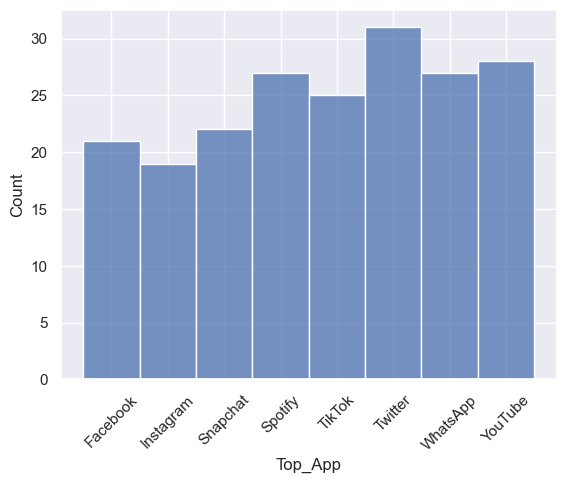

In [199]:
sns.histplot(data=df, x="Top_App")
plt.tick_params(axis='x', rotation=45)

#### Question 3: How does data usage correlate with screen time?

In [167]:
corr = df[["Data_Usage_MB", "Screen_Time_mins"]].corr().loc["Data_Usage_MB", "Screen_Time_mins"]

print(f"The correlation between data usage and screen time is {round(corr, 2)}, which means that the two parameters do not correlate.")

The correlation between data usage and screen time is 0.06, which means that the two parameters do not correlate.


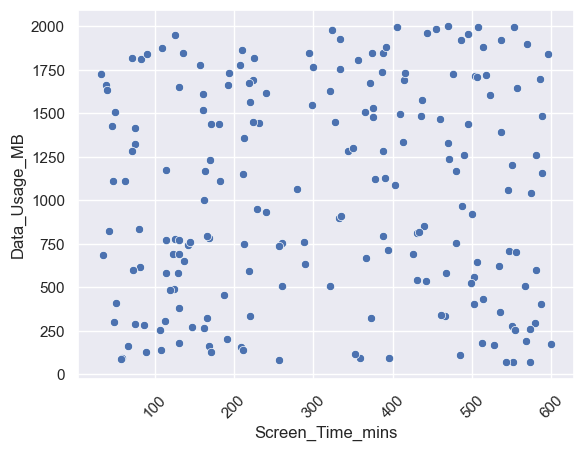

In [215]:
sns.scatterplot(data=df, x="Screen_Time_mins", y="Data_Usage_MB")
plt.tick_params(axis='x', rotation=45)

#### Question 4: Which network type is used more frequently?

In [193]:
top_ntw_type = df.Network_Type.value_counts().nlargest(1)

print(f"{top_ntw_type.index[0]} is used more frequently")

4G is used more frequently


<Axes: xlabel='Network_Type', ylabel='Count'>

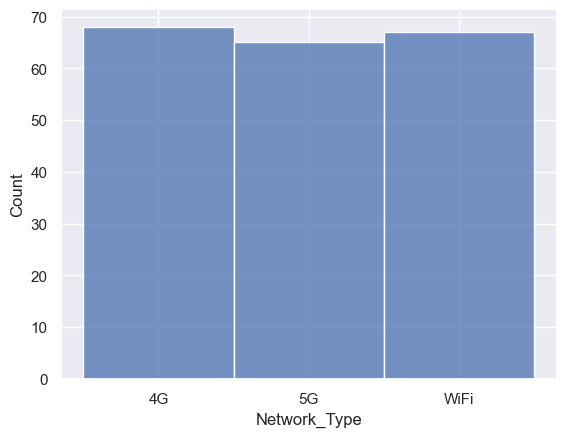

In [208]:
sns.histplot(data=df, x='Network_Type')

#### Question 5: Is there a relationship between screen time and steps count (e.g., does higher screen time mean fewer steps)?

In [221]:
df[['Screen_Time_mins', 'Steps_Count']].corr()

,Screen_Time_mins,Steps_Count
Screen_Time_mins,1.000000,0.010427
Steps_Count,0.010427,1.000000


<Axes: xlabel='Screen_Time_mins', ylabel='Steps_Count'>

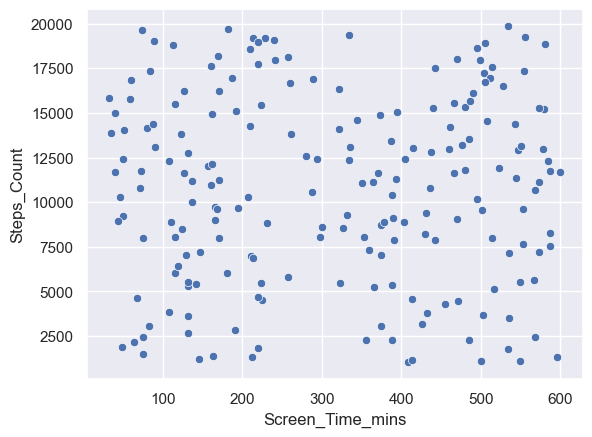

In [223]:
sns.scatterplot(data=df, x='Screen_Time_mins', y='Steps_Count')

We can see that the two variables are uncorrelated

#### Question 6: Does battery level percentage influence screen time or data usage?

In [247]:
df[['Screen_Time_mins', 'Battery_Level_percent', 'Data_Usage_MB']].corr()

,Screen_Time_mins,Battery_Level_percent,Data_Usage_MB
Screen_Time_mins,1.000000,0.125628,0.063360
Battery_Level_percent,0.125628,1.000000,-0.087561
Data_Usage_MB,0.063360,-0.087561,1.000000


<Axes: xlabel='Battery_Level_percent', ylabel='Screen_Time_mins'>

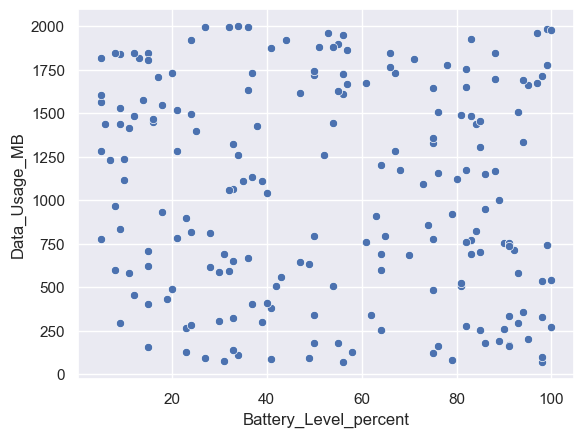

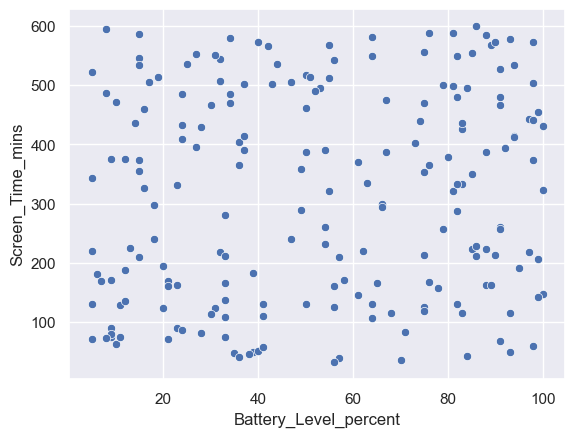

In [253]:
sns.scatterplot(data=df, x='Battery_Level_percent', y='Data_Usage_MB')
plt.figure()
sns.scatterplot(data=df, x='Battery_Level_percent', y='Screen_Time_mins')

Battery level percentage doesn't influence screen time nor data usage.

#### Question 7: On which days are call durations the longest, and is there any correlation with app usage?

In [261]:
df["Day"] = df["Date"].dt.day_name()
df.head()

,User_ID,Date,Screen_Time_mins,Battery_Level_percent,Network_Type,Data_Usage_MB,Steps_Count,Call_Duration_mins,Top_App,Day
0,User_1,2024-01-01,455,99,4G,1983.64,4299,17,TikTok,Monday
1,User_1,2024-01-02,567,42,WiFi,505.42,5654,5,TikTok,Tuesday
2,User_1,2024-01-03,334,83,4G,1923.93,12354,45,YouTube,Wednesday
3,User_1,2024-01-04,579,93,4G,295.39,13002,52,Spotify,Thursday
4,User_1,2024-01-05,115,68,WiFi,1170.95,15519,75,Facebook,Friday


In [281]:
res = df.groupby("Day")["Call_Duration_mins"].mean().nlargest(1)

Day
Wednesday    63.75
Name: Call_Duration_mins, dtype: float64

Text(0, 0.5, 'Call Duration (mins)')

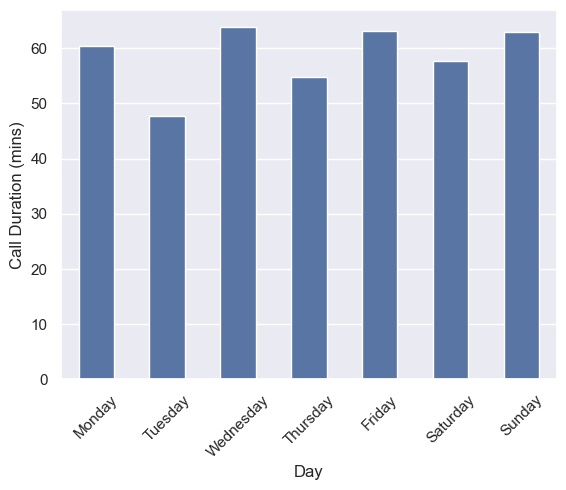

In [283]:
sns.barplot(data=df, x="Day", y="Call_Duration_mins", errorbar=None, width=0.5)
plt.tick_params(axis='x', rotation=45)
plt.ylabel('Call Duration (mins)')

Wednesday is the day where the call duration is the longest.

#### Question 8: Are there specific days or periods with higher screen time or data usage?

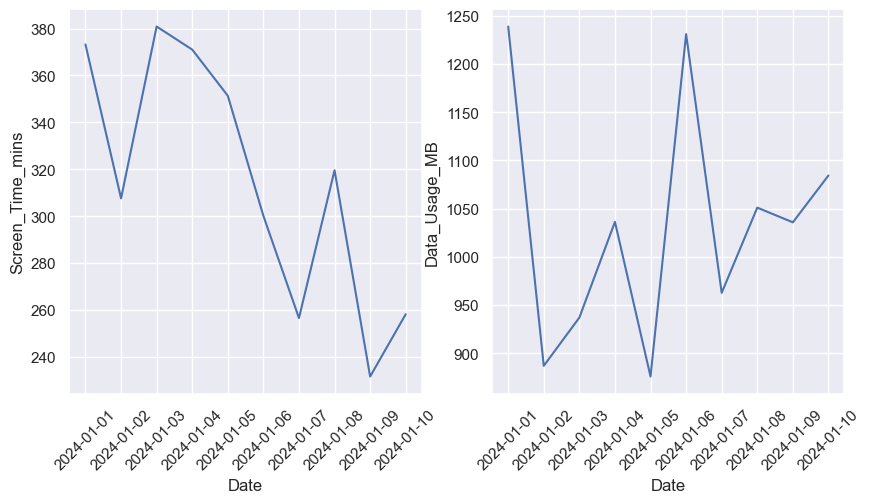

In [319]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=df, x="Date", y="Screen_Time_mins", errorbar=None)
plt.tick_params(axis='x', rotation=45)
plt.subplot(1, 2, 2)
sns.lineplot(data=df, x="Date", y="Data_Usage_MB", errorbar=None)
plt.tick_params(axis='x', rotation=45)

We notice that in average the screen time decreases overtime, and there is a spike in the third of january and in the eighth of january.

For data usage, there is a spark at the sixth of january, other than that it appears that it's progressing overtime.

#### Understanding how users interact with their devices based on screen time, call duration, and app preferences.

<Axes: xlabel='Date', ylabel='Screen_Time_mins'>

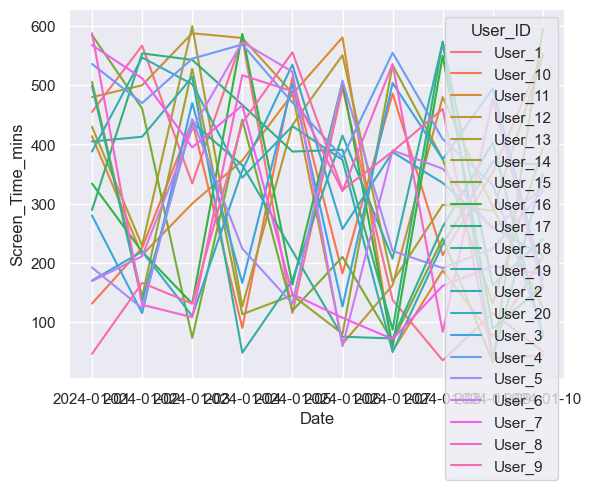

In [331]:
sns.lineplot(data=df, x="Date", y="Screen_Time_mins", hue="User_ID")